<aside>
💡 **Question 1**

Given a linked list of **N** nodes such that it may contain a loop.

A loop here means that the last node of the link list is connected to the node at position X(1-based index). If the link list does not have any loop, X=0.

Remove the loop from the linked list, if it is present, i.e. unlink the last node which is forming the loop.

</aside>

In [17]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None

def remove_loop(head):
    if head is None or head.next is None:
        return head

    slow_ptr = head
    fast_ptr = head

    # Check if there is a loop
    while fast_ptr and fast_ptr.next:
        slow_ptr = slow_ptr.next
        fast_ptr = fast_ptr.next.next
        if slow_ptr == fast_ptr:
            break

    # If no loop is present, return the head
    if slow_ptr != fast_ptr:
        return head

    # Move slow_ptr to the head and find the start of the loop
    slow_ptr = head
    while slow_ptr.next != fast_ptr.next:
        slow_ptr = slow_ptr.next
        fast_ptr = fast_ptr.next

    # Remove the loop by setting the next pointer of the previous node to None
    fast_ptr.next = None

    return head

 **Question 2**

A number **N** is represented in Linked List such that each digit corresponds to a node in linked list. You need to add 1 to it.

In [18]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None

def reverse_linked_list(head):
    prev = None
    current = head

    while current is not None:
        next_node = current.next
        current.next = prev
        prev = current
        current = next_node

    return prev

def add_one(head):
    # Reverse the linked list
    head = reverse_linked_list(head)

    # Initialize carry
    carry = 1

    current = head

    while current is not None:
        # Add carry to the current node's data
        current.data += carry

        # Update carry
        carry = current.data // 10

        # Update current node's data
        current.data %= 10

        # Move to the next node
        current = current.next

    # If there is still a carry, append a new node to the end of the list
    if carry > 0:
        new_node = Node(carry)
        current.next = new_node

    # Reverse the linked list again
    head = reverse_linked_list(head)

    return head


💡 **Question 3**

Given a Linked List of size N, where every node represents a sub-linked-list and contains two pointers:(i) a **next** pointer to the next node,(ii) a **bottom** pointer to a linked list where this node is head.Each of the sub-linked-list is in sorted order.Flatten the Link List such that all the nodes appear in a single level while maintaining the sorted order. **Note:** The flattened list will be printed using the bottom pointer instead of next pointer.

In [19]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None
        self.bottom = None

def merge(a, b):
    # If one of the linked lists is None, return the other list
    if a is None:
        return b
    if b is None:
        return a

    # Create a dummy node to store the merged list
    dummy = Node(0)

    # Set the current pointer to the dummy node
    current = dummy

    # Merge the lists in sorted order
    while a and b:
        if a.data < b.data:
            current.bottom = a
            a = a.bottom
        else:
            current.bottom = b
            b = b.bottom
        current = current.bottom

    # Attach the remaining nodes of the non-empty list
    if a:
        current.bottom = a
    else:
        current.bottom = b

    return dummy.bottom

def flatten(head):
    # Base case: if the head is None or next pointer is None, return the head
    if head is None or head.next is None:
        return head

    # Recursively flatten the remaining linked list after the current node
    head.next = flatten(head.next)

    # Merge the flattened sub-linked list with the current node's bottom linked list
    head = merge(head, head.next)

    return head

<aside>
💡 **Question 4**

You are given a special linked list with **N** nodes where each node has a next pointer pointing to its next node. You are also given **M** random pointers, where you will be given **M** number of pairs denoting two nodes **a** and **b**  **i.e. a->arb = b** (arb is pointer to random node)**.**

Construct a copy of the given list. The copy should consist of exactly **N** new nodes, where each new node has its value set to the value of its corresponding original node. Both the next and random pointer of the new nodes should point to new nodes in the copied list such that the pointers in the original list and copied list represent the same list state. None of the pointers in the new list should point to nodes in the original list.

For example, if there are two nodes **X** and **Y** in the original list, where **X.arb** **-->** **Y**, then for the corresponding two nodes **x** and **y** in the copied list, **x.arb --> y.**

Return the head of the copied linked list.

</aside>

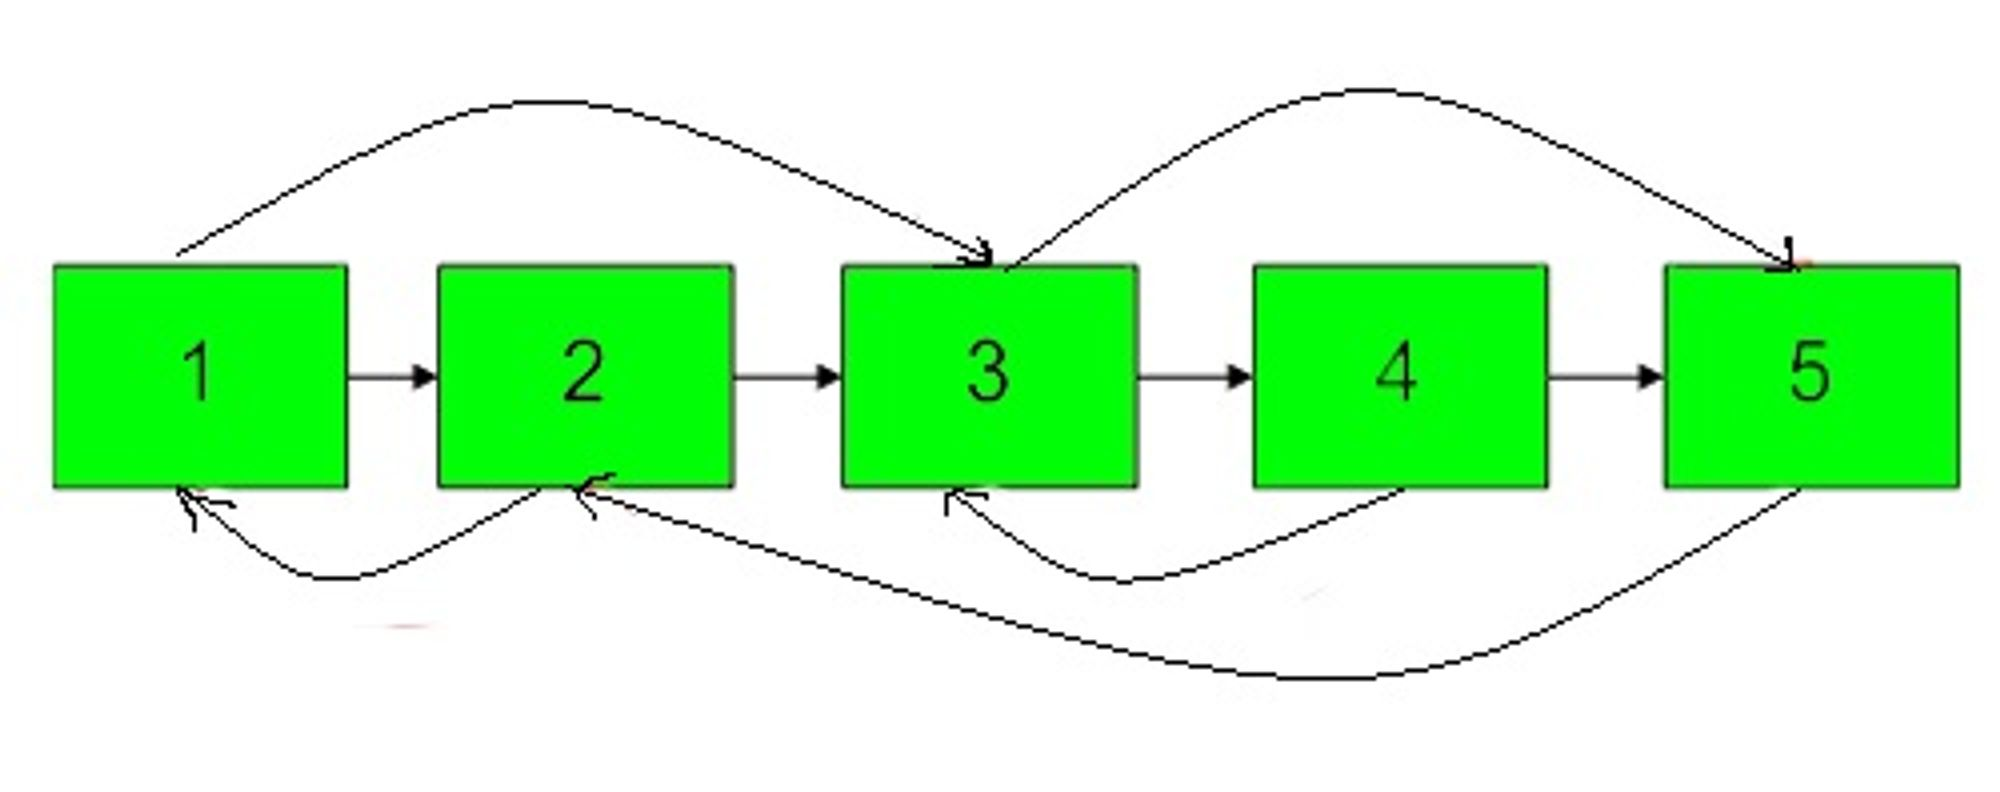

In [20]:
class Node:
    def __init__(self, val):
        self.val = val
        self.next = None
        self.random = None

def copyRandomList(head):
    if head is None:
        return None

    node_map = {}

    # Create a copy of each node and store it in the node_map
    current = head
    while current:
        node_map[current] = Node(current.val)
        current = current.next

    # Set the next and random pointers of the copied nodes
    current = head
    while current:
        copied_node = node_map[current]
        copied_node.next = node_map.get(current.next)
        copied_node.random = node_map.get(current.random)
        current = current.next

    return node_map[head]


💡 **Question 5**

Given the `head` of a singly linked list, group all the nodes with odd indices together followed by the nodes with even indices, and return *the reordered list*.

The **first** node is considered **odd**, and the **second** node is **even**, and so on.

Note that the relative order inside both the even and odd groups should remain as it was in the input.

You must solve the problem in `O(1)` extra space complexity and `O(n)` time complexity.


In [21]:
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

def oddEvenList(head):
    if head is None or head.next is None:
        return head

    odd_head = head
    even_head = head.next
    even_start = even_head

    node = even_head.next
    index = 3

    while node is not None:
        if index % 2 == 1:
            odd_head.next = node
            odd_head = odd_head.next
        else:
            even_head.next = node
            even_head = even_head.next

        node = node.next
        index += 1

    odd_head.next = even_start
    if even_head is not None:
        even_head.next = None

    return head


💡 **Question 6**

Given a singly linked list of size **N**. The task is to **left-shift** the linked list by **k** nodes, where **k** is a given positive integer smaller than or equal to length of the linked list.

In [22]:
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

def leftShiftLinkedList(head, k):
    if head is None or k <= 0:
        return head

    length = 0
    node = head
    while node.next is not None:
        node = node.next
        length += 1

    k %= length + 1  # Handle cases where k is greater than the length of the list

    if k == 0:
        return head

    slow = head
    fast = head
    for _ in range(k):
        fast = fast.next

    while fast.next is not None:
        slow = slow.next
        fast = fast.next

    new_head = slow.next
    slow.next = None
    node.next = head

    return new_head


💡 **Question 7**

You are given the `head` of a linked list with `n` nodes.

For each node in the list, find the value of the **next greater node**. That is, for each node, find the value of the first node that is next to it and has a **strictly larger** value than it.

Return an integer array `answer` where `answer[i]` is the value of the next greater node of the `ith` node (**1-indexed**). If the `ith` node does not have a next greater node, set `answer[i] = 0`.

In [23]:
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

def nextGreaterNodes(head):
    # Convert linked list to a list
    values = []
    node = head
    while node:
        values.append(node.val)
        node = node.next

    stack = []  # Stack to store indices of values
    result = [0] * len(values)  # Initialize result array with zeros

    for i in range(len(values)):
        # Process values in descending order
        while stack and values[i] > values[stack[-1]]:
            result[stack.pop()] = values[i]
        stack.append(i)

    return result

<aside>
💡 **Question 8**

Given the `head` of a linked list, we repeatedly delete consecutive sequences of nodes that sum to `0` until there are no such sequences.

After doing so, return the head of the final linked list.  You may return any such answer.

(Note that in the examples below, all sequences are serializations of `ListNode` objects.)

</aside>

In [24]:
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

def removeZeroSumSublists(head):
    # Create a dummy node to handle edge cases
    dummy = ListNode(0)
    dummy.next = head

    # Create a prefix sum dictionary
    prefix_sum = {}
    prefix_sum[0] = dummy  # Initialize prefix sum 0 with dummy node
    current_sum = 0

    # Traverse the linked list and calculate prefix sums
    node = head
    while node:
        current_sum += node.val

        if current_sum in prefix_sum:
            # Remove nodes between prefix sums
            prev = prefix_sum[current_sum]
            prev.next = node.next
            node = prev.next

            # Remove prefix sums from the dictionary
            while prev.next:
                current_sum += prev.next.val
                del prefix_sum[current_sum]
                prev = prev.next
        else:
            prefix_sum[current_sum] = node
            node = node.next

    return dummy.next